# 0402 titanic

# 1. import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os


In [2]:
data = pd.read_csv('C:/Users/user/Desktop/학교/학회/21-1/kaggle1/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. 전처리

In [4]:
# null 개수 세기
data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# categorical feature로 바꾸기
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [6]:
# Mr, Mrs 등 추출작업
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [7]:
# misspelled initial 교체
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [8]:
# Initial에 따른 나이의 평균
data.groupby('Initial')['Age'].mean() 

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [9]:
# Nan 값을 각 Initial평균 값으로 대체
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [10]:
# null값 여부 확인
data.Age.isnull().any()

False

In [11]:
# Nan값 대체
data['Embarked'].fillna('S',inplace=True)

In [12]:
data.Embarked.isnull().any()

False

In [13]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0 # age가 16이하인 경우 age_band=0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [14]:
# band age별 인원 수 분포 확인
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


In [15]:
# Family Size 변수 생성
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
# Alone 변수 생성
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

In [16]:
# Fare_Range 변수 생성
data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [17]:
# Fare_Cat 변수 만들기(age_band와 동일)
data['Fare_Cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_Cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_Cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31), 'Fare_Cat'] = 2
data.loc[(data['Fare']>31)&(data['Fare']<=513), 'Fare_Cat'] = 3

In [18]:
# String Values을 Numeric으로 변환
data['Sex'].replace(['male','female'],[0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2], inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4], inplace=True)

In [19]:
# 필요 없는 변수 제거
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'], axis=1, inplace=True)

In [20]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


# 3. decision tree

## 1) max_depth 제한 없는 decision tree

In [21]:
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [22]:
# train, test 분리
train,test = train_test_split(data,test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]

test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X=data[data.columns[1:]]
Y=data['Survived']

In [23]:
# DecisionTreeClassifier 생성 및 학습
model = DecisionTreeClassifier(random_state=0)
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)

In [24]:
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


깊이 제한 없는 경우 decision tree의 accuracy는 0.806

In [25]:
os.environ["Path"] += os.pathsep + 'C:/Program Files/Graphviz2.38/bin/'

In [26]:
# feature_names에 값을 입력하기 위해 list 형태로 전환
feature_names = data.columns.tolist()
feature_names = feature_names[1:11]
feature_names

['Pclass',
 'Sex',
 'SibSp',
 'Parch',
 'Embarked',
 'Initial',
 'Age_band',
 'Family_Size',
 'Alone',
 'Fare_Cat']

In [27]:
from sklearn.tree import export_graphviz

export_graphviz(model, 
                out_file="tree.dot", # 의사결정 트리를 파일 또는 문자열로 반환(기본: tree.dot, None일 경우 문자열로 반환)
                class_names=['Unsurvived','Survived'], 
                feature_names=feature_names, 
                rounded=True, # 둥근 모서리가 있는 노드 상자 그림
                filled=True) # 분류를 위한 다수 클래스, 다중 출력의 노드 순도를 나타내기 위해 색칠

In [28]:
print(os.getcwd())

C:\Users\user\Desktop\학교\학회\21-1\kaggle1


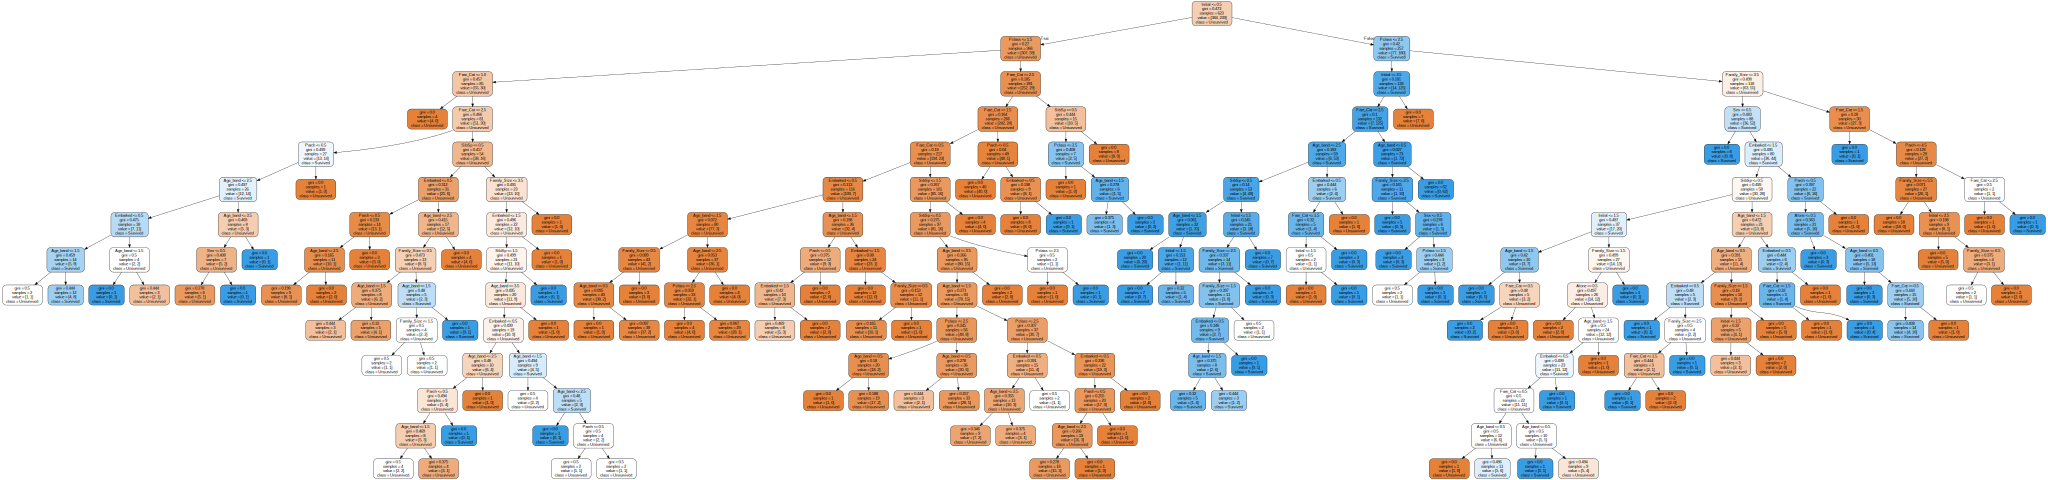

In [29]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()

dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot

In [38]:
import pydotplus
import matplotlib.image as mpimg
import io
from six import StringIO


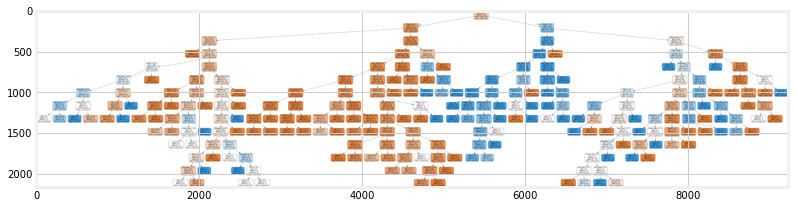

In [50]:
dot_data = io.StringIO()

export_graphviz(model, 
                out_file=dot_data, # 의사결정 트리를 파일 또는 문자열로 반환(기본: tree.dot, None일 경우 문자열로 반환)
                class_names=['Unsurvived','Survived'], 
                feature_names=feature_names, 
                rounded=True, # 둥근 모서리가 있는 노드 상자 그림
                filled=True) # 분류를 위한 다수 클래스, 다중 출력의 노드 순도를 나타내기 위해 색칠

filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(12,12))
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

plt.show()

크기가 매우 크고, 비효율적이라는 것을 알 수 있었음.

-> max_depth 설정

## 2) max_depth 제한 있는 decision tree

In [43]:
# DecisionTreeClassifier 생성 및 학습
model1 = DecisionTreeClassifier(random_state=0, max_depth=1)
model1.fit(train_X, train_Y)
prediction1 = model1.predict(test_X)

model2 = DecisionTreeClassifier(random_state=0, max_depth=2)
model2.fit(train_X, train_Y)
prediction2 = model2.predict(test_X)

model3 = DecisionTreeClassifier(random_state=0, max_depth=3)
model3.fit(train_X, train_Y)
prediction3 = model3.predict(test_X)

model4 = DecisionTreeClassifier(random_state=0, max_depth=4)
model4.fit(train_X, train_Y)
prediction4 = model4.predict(test_X)

model5 = DecisionTreeClassifier(random_state=0, max_depth=5)
model5.fit(train_X, train_Y)
prediction5 = model5.predict(test_X)

model6 = DecisionTreeClassifier(random_state=0, max_depth=6)
model6.fit(train_X, train_Y)
prediction6 = model6.predict(test_X)

model7 = DecisionTreeClassifier(random_state=0, max_depth=7)
model7.fit(train_X, train_Y)
prediction7 = model7.predict(test_X)

In [44]:
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction1,test_Y), '(max_depth=1)')
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction2,test_Y), '(max_depth=2)')
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction3,test_Y), '(max_depth=3)')
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y), '(max_depth=4)')
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction5,test_Y), '(max_depth=5)')
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction6,test_Y), '(max_depth=6)')
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction7,test_Y), '(max_depth=7)')

The accuracy of the Decision Tree is 0.7910447761194029 (max_depth=1)
The accuracy of the Decision Tree is 0.7835820895522388 (max_depth=2)
The accuracy of the Decision Tree is 0.8395522388059702 (max_depth=3)
The accuracy of the Decision Tree is 0.8246268656716418 (max_depth=4)
The accuracy of the Decision Tree is 0.8022388059701493 (max_depth=5)
The accuracy of the Decision Tree is 0.8134328358208955 (max_depth=6)
The accuracy of the Decision Tree is 0.8022388059701493 (max_depth=7)


max_depth=3인 경우의 accuracy가 0.840으로 가장 크고, max_depth 제한 없는 경우의 accuracy인 0.806보다도 큼.

max_depth=3인 경우의 decision tree 그림을 그려봄.

In [45]:
export_graphviz(model3, 
                out_file="tree.dot", 
                class_names=['Unsurvived','Survived'], 
                feature_names=feature_names, 
                rounded=True, # 둥근 모서리가 있는 노드 상자 그림
                filled=True) # 분류를 위한 다수 클래스, 다중 출력의 노드 순도를 나타내기 위해 색칠

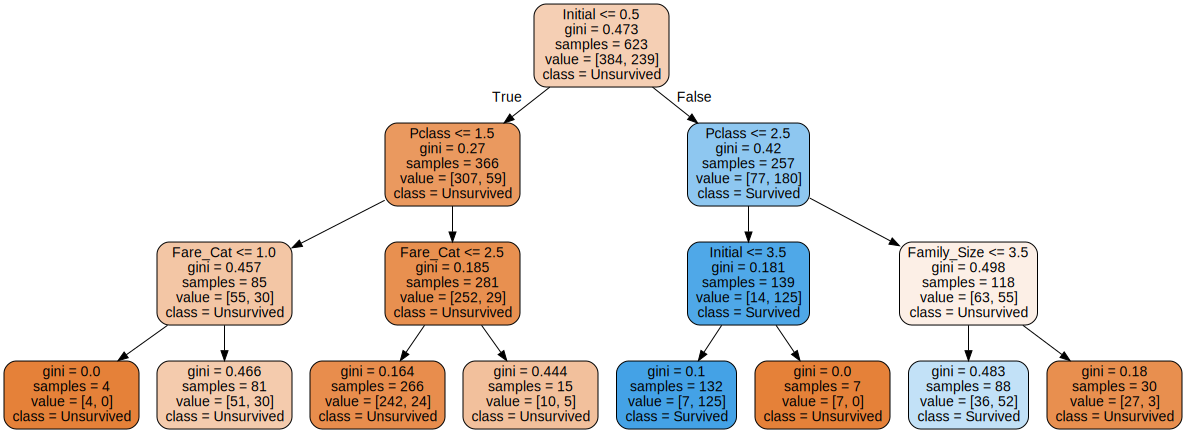

In [46]:
with open("tree.dot") as f:
    dot_graph = f.read()

dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot

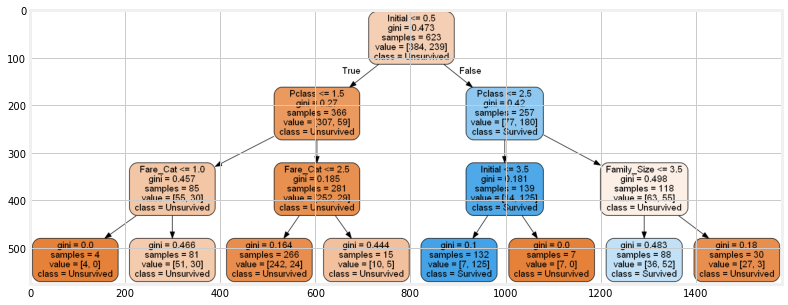

In [52]:
dot_data = io.StringIO()

export_graphviz(model3, 
                out_file=dot_data, # 의사결정 트리를 파일 또는 문자열로 반환(기본: tree.dot, None일 경우 문자열로 반환)
                class_names=['Unsurvived','Survived'], 
                feature_names=feature_names, 
                rounded=True, # 둥근 모서리가 있는 노드 상자 그림
                filled=True) # 분류를 위한 다수 클래스, 다중 출력의 노드 순도를 나타내기 위해 색칠

filename = "tree.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(12,12))
img = mpimg.imread(filename)
imgplot = plt.imshow(img)

plt.show()

# 4. bagged Decision Tree

In [ ]:
# bagged Decision Tree
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))


bagged Decision Tree의 accuracy는 0.821

In [ ]:
export_graphviz(model, 
                out_file="tree.dot", 
                class_names=['Unsurvived','Survived'], 
                feature_names=feature_names, 
                rounded=True, # 둥근 모서리가 있는 노드 상자 그림
                filled=True) # 분류를 위한 다수 클래스, 다중 출력의 노드 순도를 나타내기 위해 색칠

In [ ]:
with open("tree.dot") as f:
    dot_graph = f.read()

dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='titanic_tree', directory='images/decision_trees', cleanup=True)
dot

bagged decision tree = random forest ?

-> 다른것같음..

bagged decision tree는 decision tree 그림처럼 못그리는건가...?

->"bagged"라서 tree_ attribute가 없기때문에 못그리나

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)


estimator = model.estimators_[3]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )